# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Заголовок и сигнал.
Заголовок содержит служебную информации необходимую для воспроизведения файла. Наример, частота дескритизации расположена с 24 по 27 байты, а количество бит в сэмпле с 34 по 35 байты.
Из количества бит в сэмпле можно получить количество уровней квантования сигнала, они равны: 2^(количество бит).

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

Len is 37454 ( ). Sample rate is 22050


Len is 37454 ( ). Sample rate is 42050


Len is 37454 ( ). Sample rate is 7050


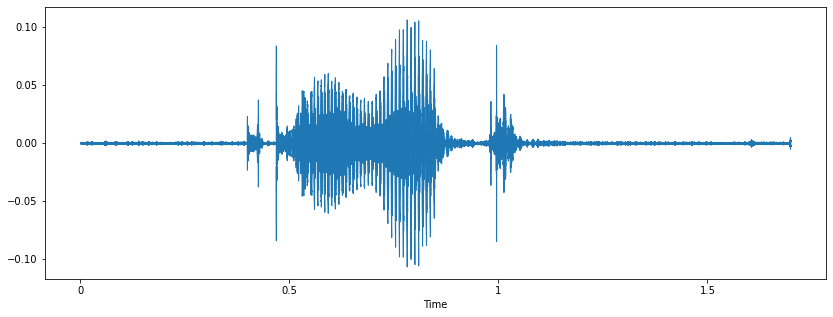

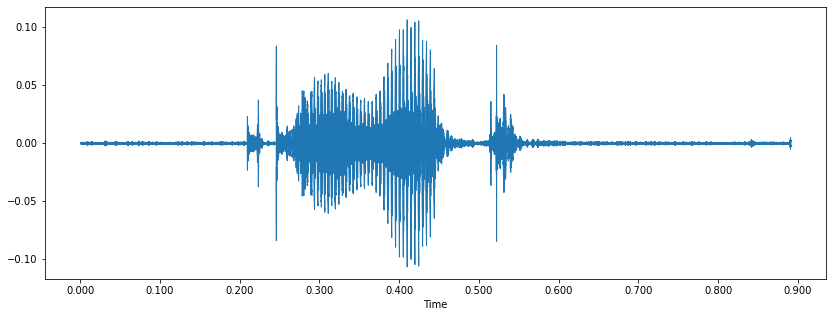

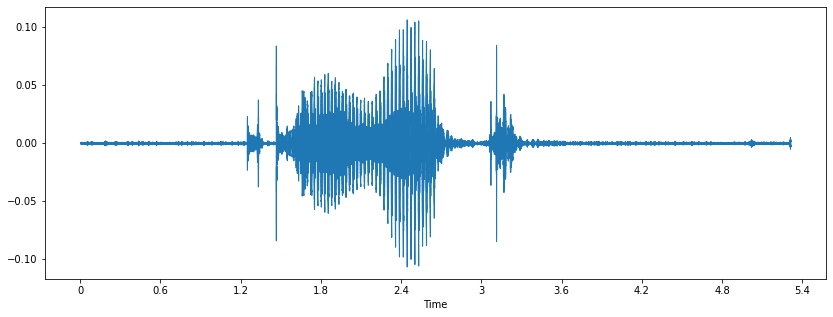

In [56]:
import IPython.display as ipd
import librosa
import librosa.display

def play_and_draw(wav, sr):
    print(f"Len is {len(wav)} ( ). Sample rate is {sr}")
    player = ipd.Audio(wav, rate=sr)
    ipd.display(player)    
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(wav, sr=sr)
    
my_speech, sr = librosa.core.load("resources/my_speech.wav")
play_and_draw(my_speech, sr)

play_and_draw(my_speech, sr + 20000)

play_and_draw(my_speech, sr - 15000)

На частоте меньше, чем изначальная на 15 кГц уже становиться тяжело разобрать речь
На частоте больше, чем изначальная на 20 кГц уже становиться тяжело разобрать речь

In [ ]:
invalid_sr = 16000
print(f"Len is {len(my_speech)} ( ). Sample rate is {sr}")
player = ipd.Audio(my_speech, rate=invalid_sr)
ipd.display(player)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(my_speech, sr=sr)

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

В wav файле данные хранятся не сжато

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [4]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [5]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

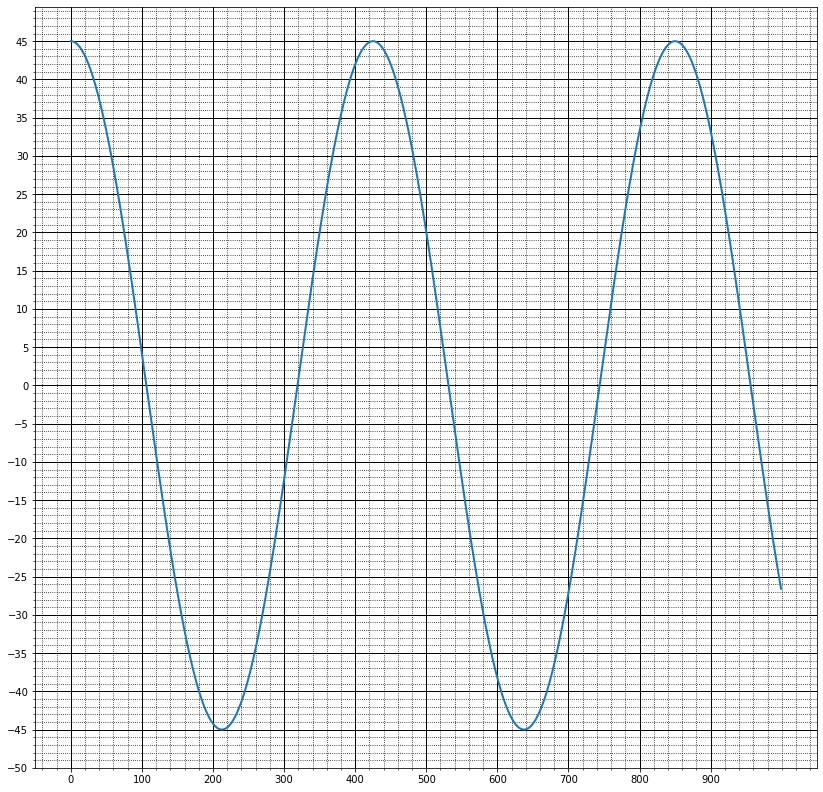

In [6]:
draw_signal(test_data['task2']['a'])

In [7]:
def get_extremum(Signal, From = 0):
    N = len(Signal)
    LastDirection = Signal[From + 1] - Signal[From]
    
    for i in range(From + 1, N - 1):
        Direction = Signal[i] - Signal[i - 1]
        if ( Direction * LastDirection < 0):
            return i - 1
        
        if (Direction != 0):
            LastDirection = Direction

    return -1

def find_period(Signal):
    N = len(Signal)
    
    LastExt = get_extremum(Signal)
    HalfT = []
    
    for i in range(N):
        Ext = get_extremum(Signal, LastExt)
        if (Ext == -1):
            return np.mean(HalfT) * 2
        
        HalfT.append(Ext - LastExt)
        LastExt = Ext
        
    assert False
    
def find_amplitude(Signal):
    N = len(Signal)
    
    LastExt = get_extremum(Signal)
    Amplitude = []
    
    for i in range(N):
        Ext = get_extremum(Signal, LastExt)
        if (Ext == -1):
            return np.mean(Amplitude) / 2
        
        Amplitude.append(abs(Signal[Ext] - Signal[LastExt]))
        LastExt = Ext
        
    assert False
    
def make_cos(T, Amplitude, Phase = 0, N = 1000):
    return Amplitude * np.cos([ 2 * i * np.pi / T + Phase for i in range(0, 1000)])

In [8]:
# YOUR CODE HERE

T = find_period(test_data["task2"]["a"])
Amplitude = find_amplitude(test_data["task2"]["a"])

print("T:", T, "Amplitude:", Amplitude)

a = make_cos(T, Amplitude)

T: 424.6666666666667 Amplitude: 44.99938528695403


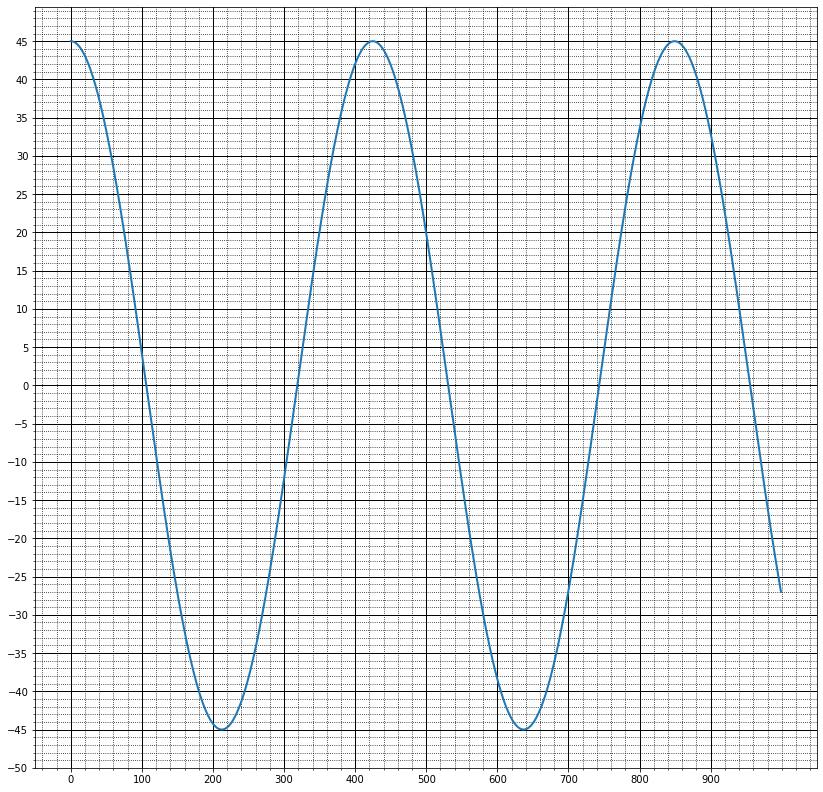

In [9]:
draw_signal(a)

In [10]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425} $

3. Фаза - $\phi= $0

### Сигнал ***b***

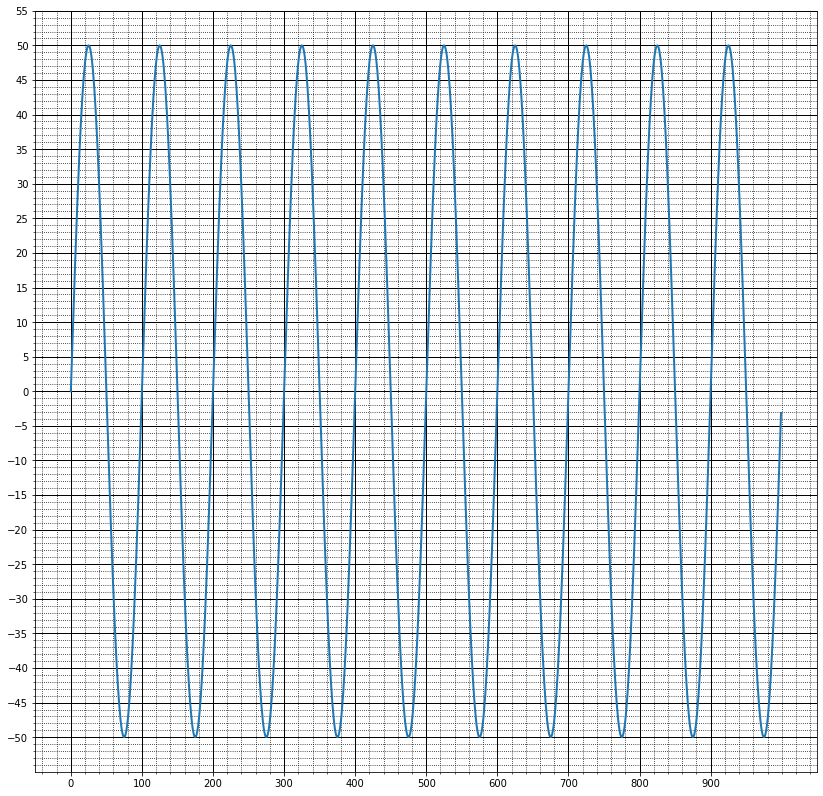

In [11]:
draw_signal(test_data['task2']['b'])

In [12]:
T = find_period(test_data["task2"]["b"])
Amplitude = find_amplitude(test_data["task2"]["b"])

print("T:", T, "Amplitude:", Amplitude)

b = make_cos(T, Amplitude, -np.pi / 2)

T: 100.0 Amplitude: 50.0


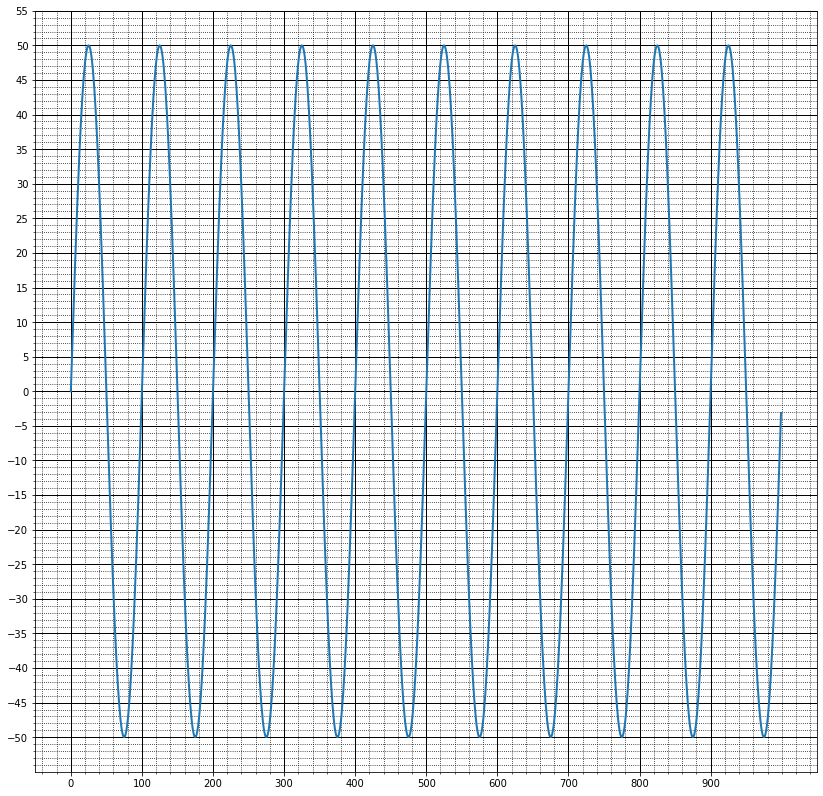

In [13]:
draw_signal(b)

In [14]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100}$

3. Фаза - $\phi= -\frac{pi}{2}$

### Сигнал ***c***

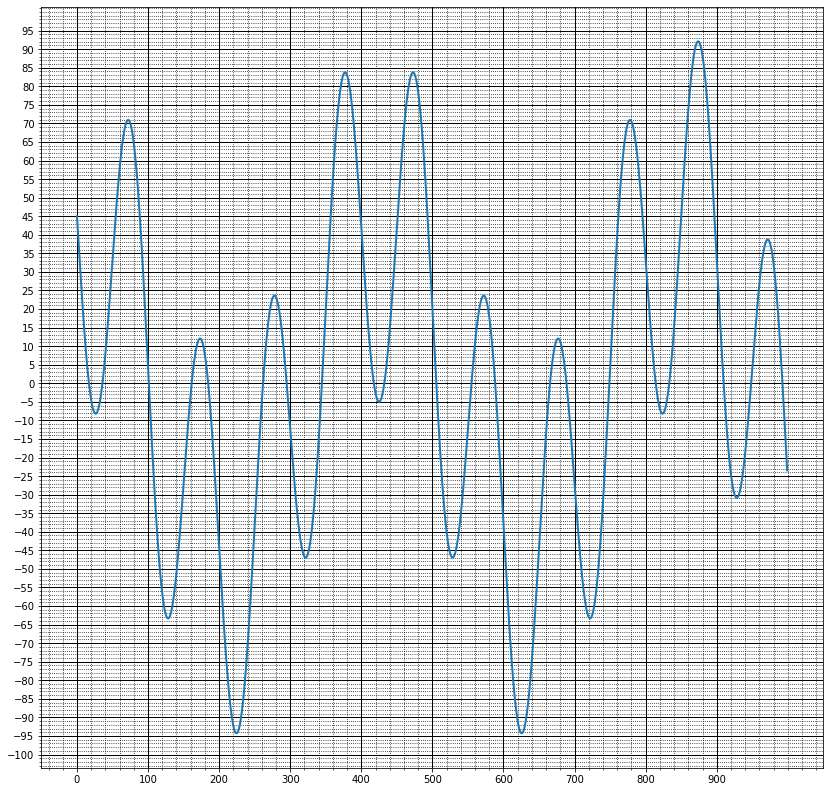

In [15]:
draw_signal(test_data['task2']['c'])

T1: 99.57894736842105 Amplitude1: 49.96869550890615


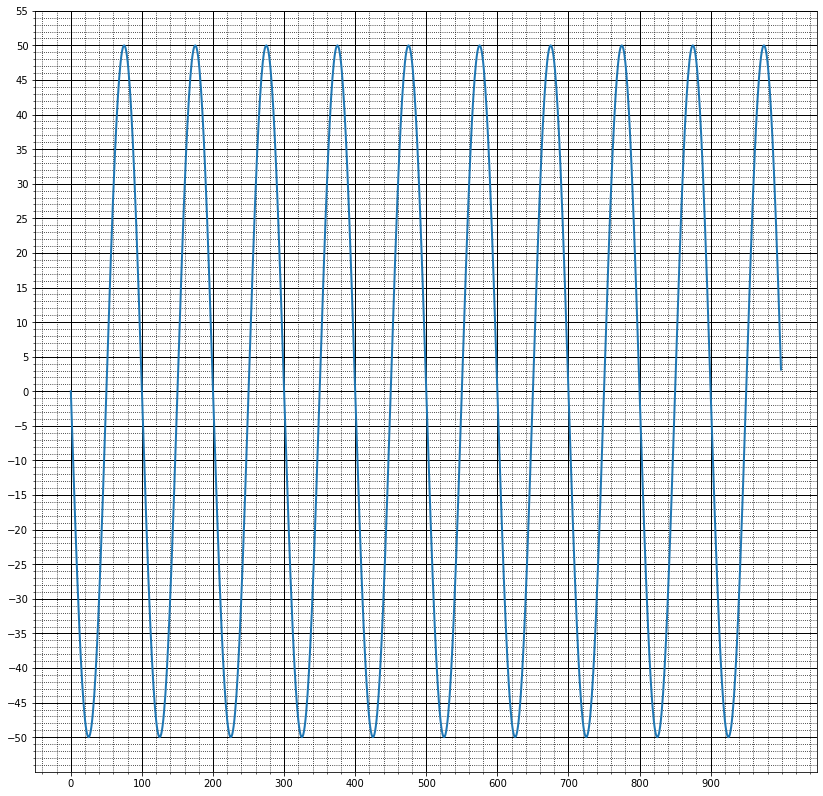

T2: 425.3333333333333 Amplitude2: 44.99938528695403


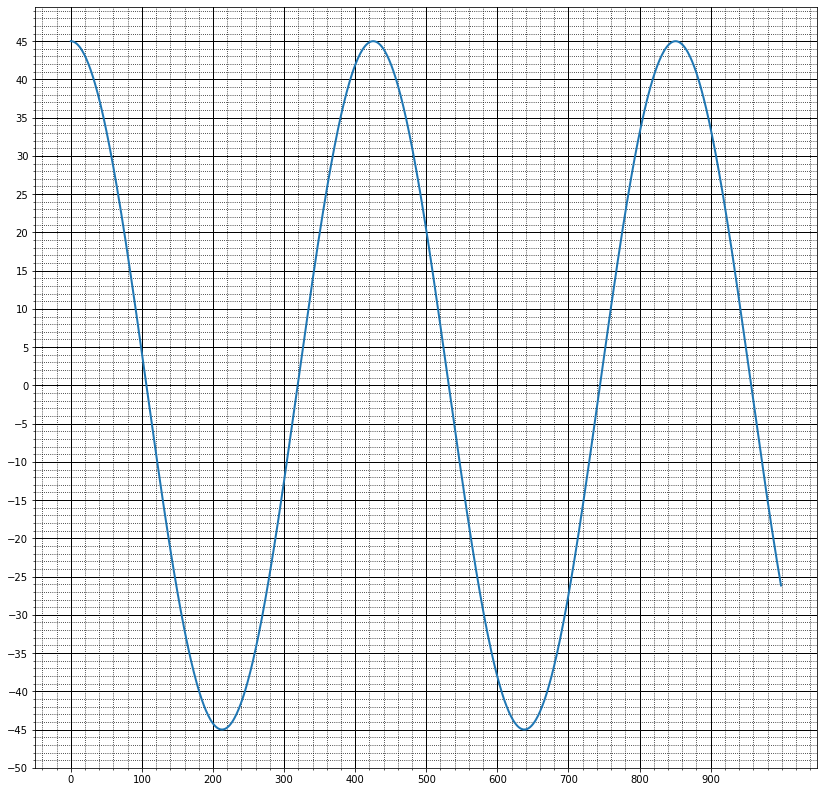

In [19]:
T = find_period(test_data["task2"]['c'])
Amplitude = find_amplitude(test_data["task2"]["c"])

print("T1:", T, "Amplitude1:", Amplitude)
Part1 = make_cos(100, 50, np.pi / 2)
draw_signal(Part1)

T = find_period(test_data["task2"]["c"] - Part1)
Amplitude = find_amplitude(test_data["task2"]["c"] - Part1)
print("T2:", T, "Amplitude2:", Amplitude)

Part2 = make_cos(T, Amplitude)
draw_signal(Part2)

c = Part1 + Part2

In [20]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [21]:
def convolve_element(X, H):
    assert len(X) == len(H)
    N = len(H)
#     print(X, H)
    return np.sum([X[i] * H[(N - 1) - i] for i in range(N)])

def convolve(in1, in2):
    N = len(in1)
    T = len(in2)
    
    YLen = N + T - 1
    y = []
    
#     print(YLen)
    
    for i in range(YLen):
#         print(i)
        
        A = max((T - 1) - i, 0)
        B = min(YLen - i, T)
        In2Intersection = in2[A : B]
#         print("A:", A, "B:", B, "Len:", len(In2Intersection))
        
        A = max(i - (T - 1), 0)
        B = A + len(In2Intersection)
        In1Intersection = in1[A : B]
#         print("A:", A, "B:", B, "Len:", len(In1Intersection))
        
        y.append(convolve_element(In1Intersection, In2Intersection))
        
#         print()
        
    return y

In [28]:
from scipy import signal

def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}, {len(my_result)}")
        print(f"Scipy result {scipy_result}, {len(scipy_result)}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [29]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [30]:
test_convolve(a, b)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

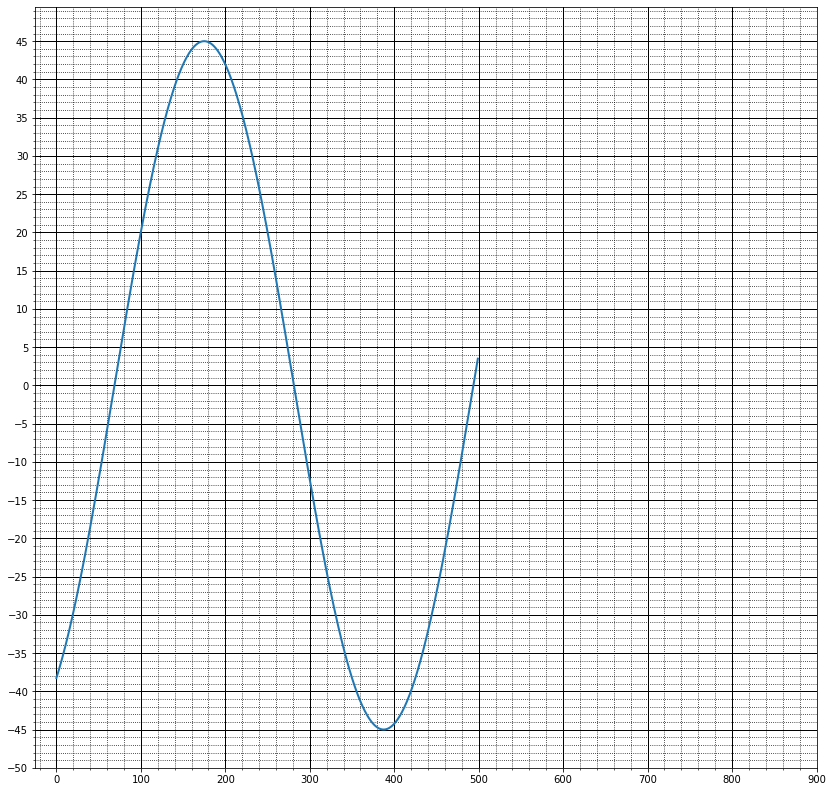

In [31]:
# YOUR CODE HERE
a = test_data['task2']['a'][250 : 750]
draw_signal(a)

Сигнал **b**

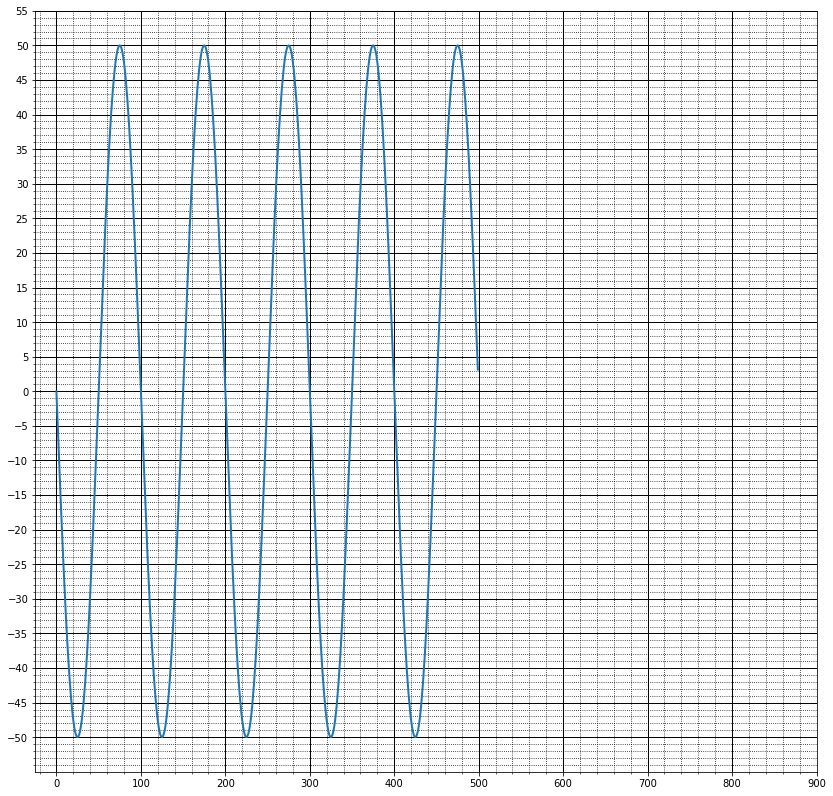

In [32]:
# YOUR CODE HERE
b = test_data['task2']['b'][250 : 750]
draw_signal(b)

Свертка **a** и **b**

AttributeError: 'list' object has no attribute 'min'

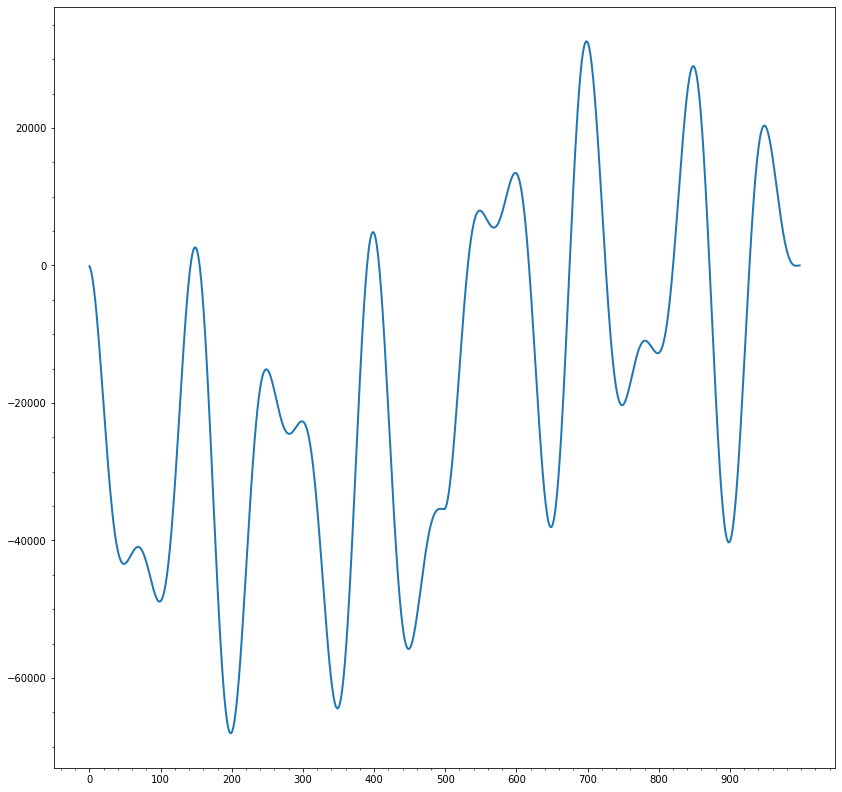

In [33]:
# YOUR CODE HERE
ConvolveAB = convolve(a, b)
draw_signal(ConvolveAB)

Все 3 графика на одной картинке:

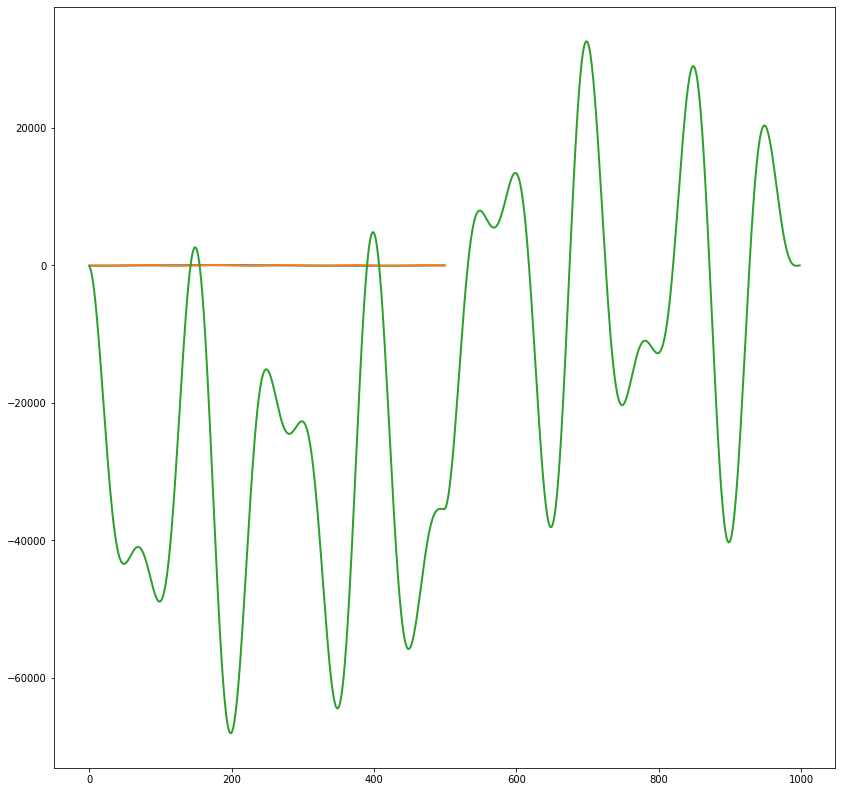

In [36]:
plt.figure(figsize=(14, 14))
plt.plot(a, linewidth=2)
plt.plot(b, linewidth=2)
plt.plot(ConvolveAB, linewidth=2)
# plt.minorticks_on()
# plt.xticks(np.arange(0, 1000, step=100))
# plt.yticks(np.arange((data.min().round())//10*10, 
#                          (data.max().round())//10*10+10, step=5))
# plt.grid(which='major',
#     color = 'k', 
#     linewidth = 1)
# plt.grid(which='minor', 
#     color = 'k', 
#     linestyle = ':')
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE